## Import Dependancies

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
pip install geopandas

In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [80]:
df=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (6)\\Air_Quality.csv")

In [83]:
df.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0


In [21]:
df.columns

Index(['id', 'country', 'state', 'city', 'station', 'pollutant_id',
       'last_update', 'pollutant_min', 'pollutant_max', 'pollutant_avg'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1836 non-null   int64  
 1   country        1836 non-null   object 
 2   state          1836 non-null   object 
 3   city           1836 non-null   object 
 4   station        1836 non-null   object 
 5   pollutant_id   1836 non-null   object 
 6   last_update    1836 non-null   object 
 7   pollutant_min  1738 non-null   float64
 8   pollutant_max  1738 non-null   float64
 9   pollutant_avg  1738 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 143.6+ KB


In [18]:
df.describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,1836.000000,1738.000000,1738.000000,1738.000000
mean,918.500000,28.414269,96.873418,54.100690
std,530.151865,34.403811,104.765094,60.824158
min,1.000000,1.000000,1.000000,1.000000
25%,459.750000,5.000000,21.000000,12.000000
50%,918.500000,14.000000,63.000000,31.000000
75%,1377.250000,39.000000,124.000000,70.000000
max,1836.000000,217.000000,500.000000,314.000000


### It denotes that there are presence of outliers. But here outliers are important as it might denote some important information regarding high amount of pollution.

In [8]:
df.isnull().sum()

id                0
country           0
state             0
city              0
station           0
pollutant_id      0
last_update       0
pollutant_min    98
pollutant_max    98
pollutant_avg    98
dtype: int64

In [9]:
df.isnull().mean().round(4) * 100

id               0.00
country          0.00
state            0.00
city             0.00
station          0.00
pollutant_id     0.00
last_update      0.00
pollutant_min    5.34
pollutant_max    5.34
pollutant_avg    5.34
dtype: float64

In [22]:
df['pollutant_min']=df['pollutant_min'].fillna(df['pollutant_min'].mean())
df['pollutant_max']=df['pollutant_max'].fillna(df['pollutant_max'].mean())
df['pollutant_avg']=df['pollutant_avg'].fillna(df['pollutant_avg'].mean())

In [24]:
df.isnull().sum()

id               0
country          0
state            0
city             0
station          0
pollutant_id     0
last_update      0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [45]:
df.describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,1836.000000,1836.000000,1836.000000,1836.000000
mean,918.500000,28.414269,96.873418,54.100690
std,530.151865,33.472521,101.929169,59.177686
min,1.000000,1.000000,1.000000,1.000000
25%,459.750000,5.000000,23.000000,12.000000
50%,918.500000,16.000000,68.500000,34.000000
75%,1377.250000,37.000000,121.000000,66.000000
max,1836.000000,217.000000,500.000000,314.000000


<AxesSubplot:>

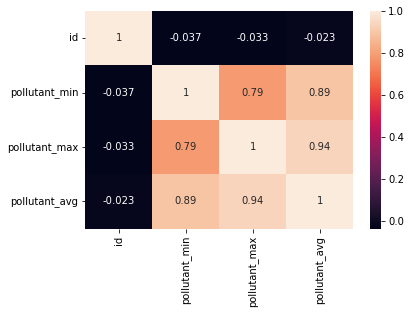

In [26]:
# Correlation

sns.heatmap(df.corr(), annot=True)

### There seems to be a higher correlation between pollutant_max and pollutant_avg. Else other columns has normal correlation.

In [28]:
# Some data visualization

state_pollution_table = pd.crosstab(index=df["state"], columns=df["pollutant_id"])
state_pollution_table

pollutant_id,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
state,,,,,,,
Andhra_Pradesh,4,4,4,4,4,4,4
Assam,2,2,2,2,1,2,2
Bihar,10,8,10,10,8,10,10
Chandigarh,2,2,2,2,2,2,2
Chhattisgarh,1,0,1,0,1,1,1
Delhi,38,32,37,38,37,38,31
Gujarat,13,9,11,10,13,13,13
Haryana,30,25,30,30,26,30,29
Jammu_&_Kashmir,1,1,1,0,1,1,1


<AxesSubplot:xlabel='state'>

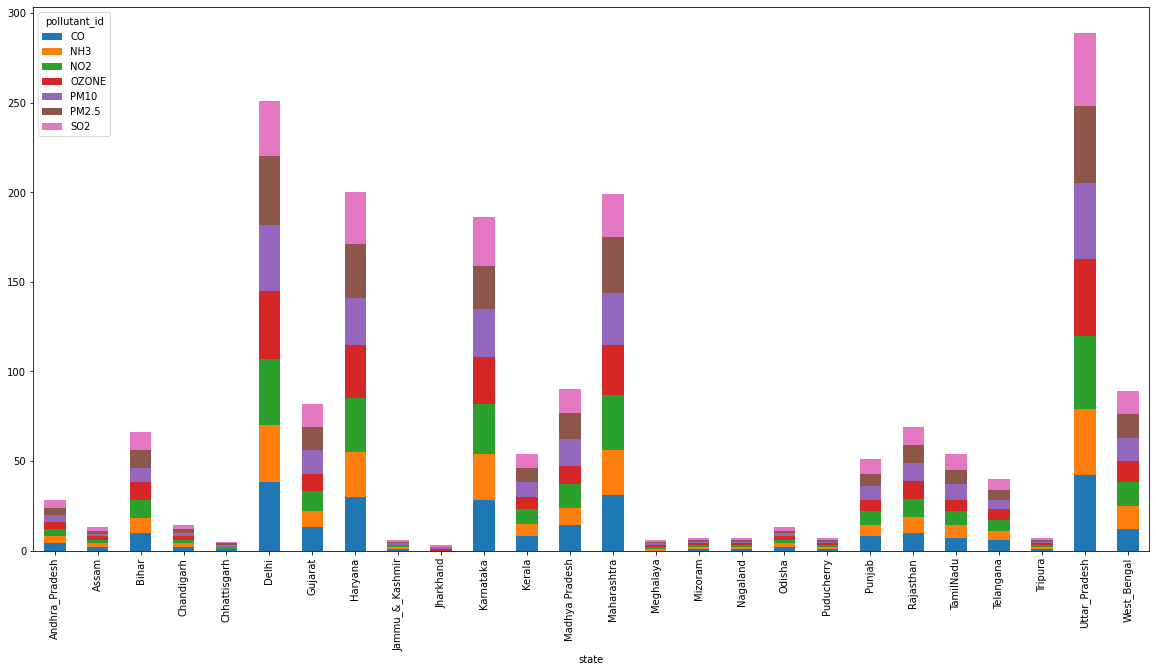

In [33]:
state_pollution_table.plot(kind="bar", figsize=(20,10),stacked=True)

### we clearly see that delhi haryana karnataka uttarpardesh and maharashtra has significantly higher pollution than the others.

In [34]:
# lets now separate our dataset with states that have highest pollution id counts and compare between them 

delhi_df=df[df.state == 'Delhi']
haryana_df=df[df.state == 'Haryana']
maharashtra_df=df[df.state == 'Maharashtra']
uttarpradesh_df=df[df.state == 'Uttar_Pradesh']
karnataka_df=df[df.state == 'Karnataka']

In [84]:
delhi_df

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
126,127,India,Delhi,Delhi,"Alipur, Delhi - DPCC",PM2.5,21-10-2021 01:00:00,88.000000,315.000000,223.00000
127,128,India,Delhi,Delhi,"Alipur, Delhi - DPCC",PM10,21-10-2021 01:00:00,105.000000,403.000000,199.00000
128,129,India,Delhi,Delhi,"Alipur, Delhi - DPCC",NO2,21-10-2021 01:00:00,8.000000,109.000000,48.00000
129,130,India,Delhi,Delhi,"Alipur, Delhi - DPCC",NH3,21-10-2021 01:00:00,28.414269,96.873418,54.10069
130,131,India,Delhi,Delhi,"Alipur, Delhi - DPCC",SO2,21-10-2021 01:00:00,6.000000,15.000000,9.00000
131,132,India,Delhi,Delhi,"Alipur, Delhi - DPCC",CO,21-10-2021 01:00:00,30.000000,83.000000,38.00000
132,133,India,Delhi,Delhi,"Alipur, Delhi - DPCC",OZONE,21-10-2021 01:00:00,2.000000,69.000000,19.00000
133,134,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",PM2.5,21-10-2021 01:00:00,113.000000,344.000000,235.00000
134,135,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",PM10,21-10-2021 01:00:00,28.414269,96.873418,54.10069
135,136,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",NO2,21-10-2021 01:00:00,75.000000,171.000000,128.00000


In [89]:
delhi_df.groupby(["pollutant_id"]).mean()

,id,pollutant_min,pollutant_max,pollutant_avg
pollutant_id,,,,
CO,252.078947,28.379323,111.575616,44.739492
NH3,255.187500,6.775892,15.804589,10.568793
NO2,250.432432,25.621622,93.135135,53.378378
OZONE,253.078947,8.526316,80.052632,25.210526
PM10,249.621622,114.925481,285.178926,173.197353
PM2.5,247.473684,69.743232,294.437375,169.218476
SO2,257.548387,5.645161,21.064516,11.548387


<AxesSubplot:xlabel='pollutant_id', ylabel='pollutant_avg'>

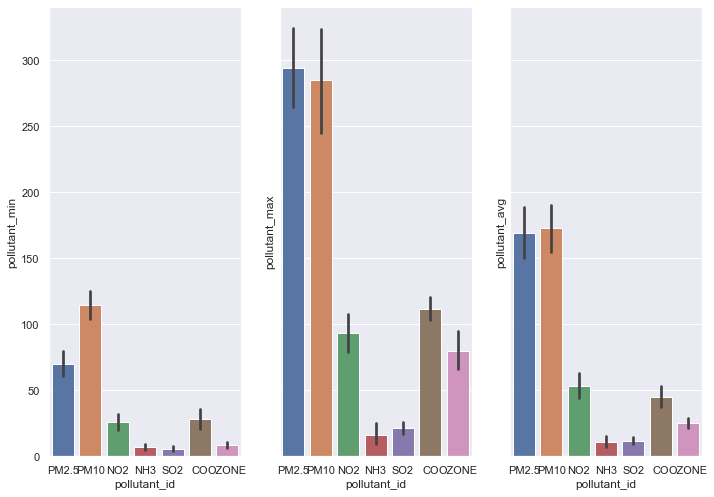

In [38]:
# lets check the distribution of pollution particles in this states

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1, 3,sharey=True)
sns.barplot(ax=axes[0],x='pollutant_id',y='pollutant_min',data=delhi_df )
sns.barplot(ax=axes[1],x='pollutant_id',y='pollutant_max',data=delhi_df )
sns.barplot(ax=axes[2],x='pollutant_id',y='pollutant_avg',data=delhi_df )

### we can see that even the minimum levels of pm2.5 and pm10 are not healthy for delhi even the average pollutant values are reasonably high to be concerened about air quality in delhi.

In [90]:
maharashtra_df.groupby(["pollutant_id"]).mean()

,id,pollutant_min,pollutant_max,pollutant_avg
pollutant_id,,,,
CO,1100.709677,26.290323,60.193548,39.806452
NH3,1088.000000,3.776571,14.274937,6.684028
NO2,1102.483871,13.505067,46.790118,26.883960
OZONE,1100.785714,9.714286,49.928571,25.785714
PM10,1098.586207,66.166501,138.922305,93.455220
PM2.5,1095.483871,44.736404,138.636995,75.619399
SO2,1098.416667,11.492856,33.406118,19.425058


<AxesSubplot:xlabel='pollutant_id', ylabel='pollutant_avg'>

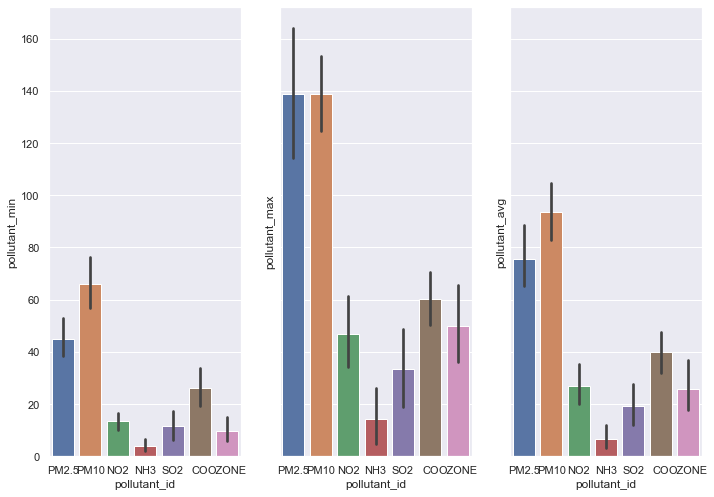

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1, 3,sharey=True)
sns.barplot(ax=axes[0],x='pollutant_id',y='pollutant_min',data=maharashtra_df )
sns.barplot(ax=axes[1],x='pollutant_id',y='pollutant_max',data=maharashtra_df )
sns.barplot(ax=axes[2],x='pollutant_id',y='pollutant_avg',data=maharashtra_df )

### in case maharashtra we can clearly conclude that the levels of pm2.5 pm 10 even though they are lower than delhi in avg they are stil quite high and not healthy . the air pollution due to CO is also a big concern in case of maharashtra

In [91]:
haryana_df.groupby(["pollutant_id"]).mean()

,id,pollutant_min,pollutant_max,pollutant_avg
pollutant_id,,,,
CO,562.100000,20.713809,83.362447,36.203356
NH3,557.200000,6.120000,9.400000,7.400000
NO2,559.300000,21.147142,47.129114,30.270023
OZONE,563.100000,13.700000,76.333333,35.000000
PM10,554.461538,103.939010,268.725901,161.311565
PM2.5,557.433333,86.180476,288.295781,180.036690
SO2,561.931034,6.393595,27.650808,13.382782


<AxesSubplot:xlabel='pollutant_id', ylabel='pollutant_avg'>

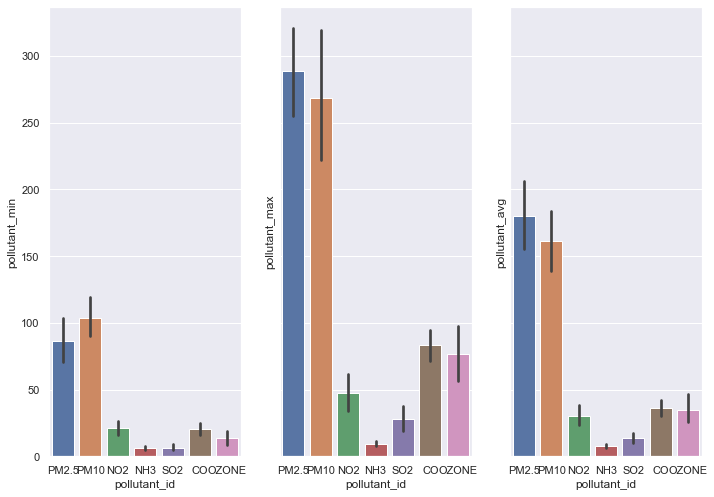

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1, 3,sharey=True)
sns.barplot(ax=axes[0],x='pollutant_id',y='pollutant_min',data=haryana_df )
sns.barplot(ax=axes[1],x='pollutant_id',y='pollutant_max',data=haryana_df )
sns.barplot(ax=axes[2],x='pollutant_id',y='pollutant_avg',data=haryana_df )

### the air pollution levels for Haryana is probably worst among the cities we considered with both pm2.5 and pm 10 values over 150 level which is very unhealthy.

In [92]:
uttarpradesh_df.groupby(["pollutant_id"]).mean()

,id,pollutant_min,pollutant_max,pollutant_avg
pollutant_id,,,,
CO,1604.214286,25.928571,95.238095,45.714286
NH3,1602.648649,4.567568,10.810811,7.162162
NO2,1603.146341,16.790592,66.484718,37.392700
OZONE,1605.976744,6.162791,80.837209,35.000000
PM10,1601.809524,104.928571,277.357143,165.238095
PM2.5,1600.255814,72.102657,281.462173,168.281411
SO2,1602.902439,9.853659,29.682927,16.512195


<AxesSubplot:xlabel='pollutant_id', ylabel='pollutant_avg'>

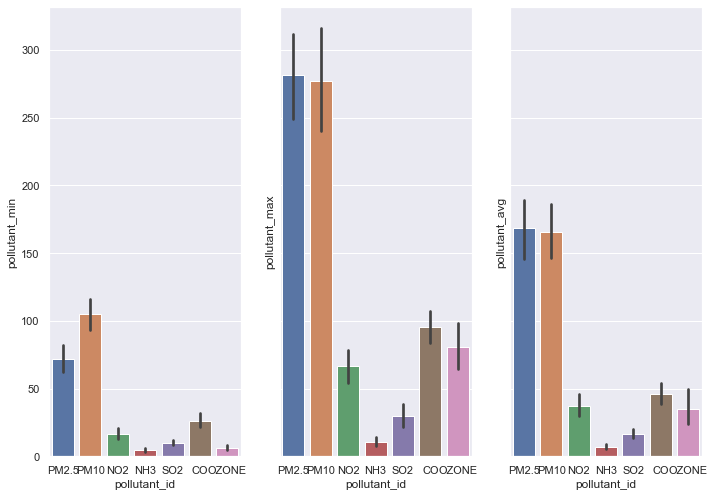

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1, 3,sharey=True)
sns.barplot(ax=axes[0],x='pollutant_id',y='pollutant_min',data=uttarpradesh_df )
sns.barplot(ax=axes[1],x='pollutant_id',y='pollutant_max',data=uttarpradesh_df )
sns.barplot(ax=axes[2],x='pollutant_id',y='pollutant_avg',data=uttarpradesh_df )

### the average pollution levels are quite high for Uttarparadesh as well with significant pollution levels for co, ozone and no2

In [93]:
karnataka_df.groupby(["pollutant_id"]).mean()

,id,pollutant_min,pollutant_max,pollutant_avg
pollutant_id,,,,
CO,762.035714,24.321429,59.750000,36.464286
NH3,764.192308,3.477472,8.572055,5.388488
NO2,759.142857,15.107143,44.821429,26.785714
OZONE,767.153846,15.307692,53.423077,31.692308
PM10,759.740741,36.956613,99.731364,63.525977
PM2.5,757.708333,25.916667,86.000000,51.875000
SO2,760.481481,7.629630,26.185185,13.000000


<AxesSubplot:xlabel='pollutant_id', ylabel='pollutant_avg'>

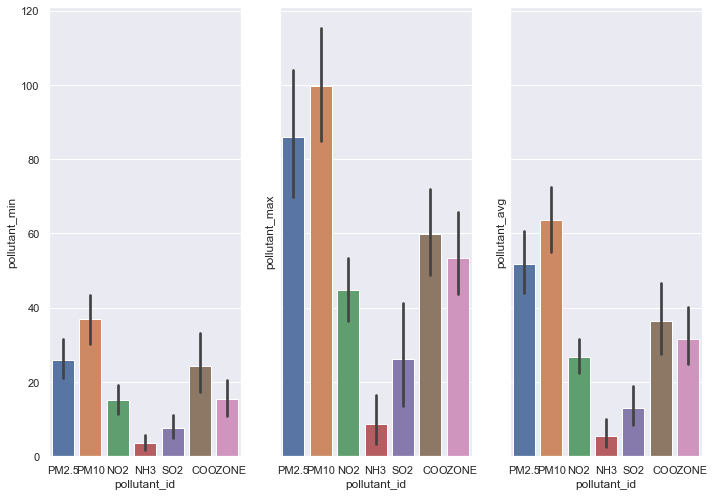

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1, 3,sharey=True)
sns.barplot(ax=axes[0],x='pollutant_id',y='pollutant_min',data=karnataka_df )
sns.barplot(ax=axes[1],x='pollutant_id',y='pollutant_max',data=karnataka_df )
sns.barplot(ax=axes[2],x='pollutant_id',y='pollutant_avg',data=karnataka_df )

### Avg pollution level for karnataka is quite low when compared to other cities we have displayed in bar charts ,however there significant amount of ozone gas emisson in karnataka which we can conclude from the bar chart.

## Top ten cities with highest pollution

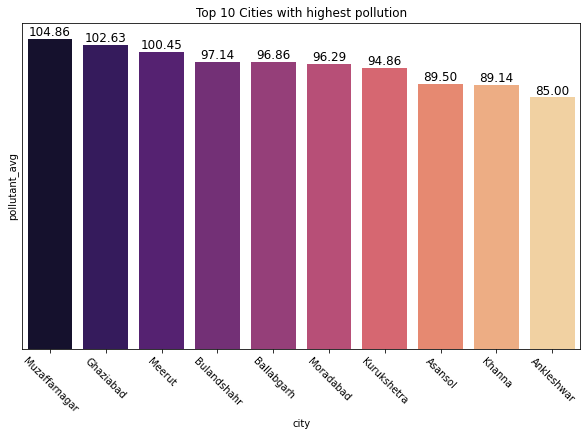

In [10]:
plt.figure(figsize=(10, 6))


highest_city=df.groupby(['city'])['pollutant_avg'].mean().nlargest(10).reset_index()

ax=sns.barplot(data=highest_city,x='city',y='pollutant_avg',palette='magma',linewidth=10)
for p in ax.patches:
    ax.annotate(format((p.get_height()), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='top',
                   size=12,
                   xytext=(0, 13),
                   textcoords='offset points')
plt.tick_params(left = False,labelleft = False)
plt.xticks(rotation=315)
plt.title('Top 10 Cities with highest pollution')
plt.show()


## Top ten cities with lowest pollution

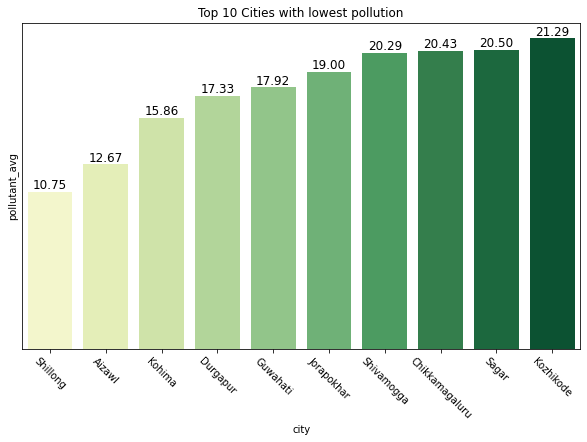

In [11]:
plt.figure(figsize=(10, 6))
palette = sns.light_palette("seagreen", as_cmap=True)
lowest_city=df.groupby(['city'])['pollutant_avg'].mean().nsmallest(10).reset_index()
ax=sns.barplot(data=lowest_city,x='city',y='pollutant_avg',palette='YlGn')
for p in ax.patches:
    ax.annotate(format((p.get_height()), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='top',
                   size=12,
                   xytext=(0, 13),
                   textcoords='offset points')
plt.tick_params(left = False,labelleft = False)
plt.xticks(rotation=315)
plt.title('Top 10 Cities with lowest pollution')
plt.show()

In [12]:
grouped_city = df.groupby(['city'])['pollutant_avg'].mean().reset_index()

In [13]:
grouped_city

,city,pollutant_avg
0,Agartala,32.000000
1,Agra,72.058824
2,Ahmedabad,56.914286
3,Aizawl,12.666667
4,Ajmer,49.285714
...,...,...
137,Vijayapura,26.428571
138,Visakhapatnam,76.428571
139,Vrindavan,76.714286
140,Yadgir,27.571429


## View on map using Latitude and Longitude

In [14]:
geolocator = Nominatim(timeout=1, user_agent = "myGeolocator")
grouped_city = df.groupby(['city'])['pollutant_avg'].mean().reset_index()
def geocode_my_address(addr):

    try:
        x = geolocator.geocode(addr)
        lon_lat = x.longitude, x.latitude
        return lon_lat
    except:
        lon_lat = None, None
        return lon_lat

grouped_city['lon'], grouped_city['lat'] = zip(*grouped_city['city'].apply(lambda x: geocode_my_address(x)))

In [15]:
city_map = folium.Map(location=[19.667417,76.827826], tiles = "Stamen Toner",
                    
                      zoom_start = 5)

data_heatmap = grouped_city[['lat','lon']]
data_heatmap = grouped_city.dropna(axis=0, subset=['lat','lon'])
data_heatmap = [[row['lat'],row['lon']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=15).add_to(city_map)

city_map

## AQI Highest in Delhi followed by Uttar pradesh & Haryana

## Top 10 States with highest pollution

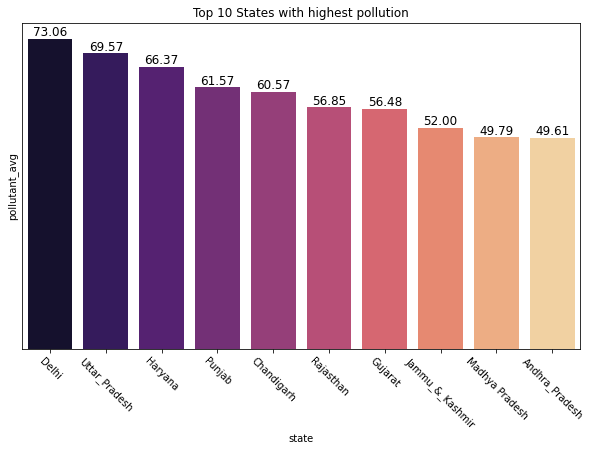

In [16]:
plt.figure(figsize=(10, 6))


highest_states=df.groupby(['state'])['pollutant_avg'].mean().nlargest(10).reset_index()

ax=sns.barplot(data=highest_states,x='state',y='pollutant_avg',palette='magma',linewidth=10)
for p in ax.patches:
    ax.annotate(format((p.get_height()), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='top',
                   size=12,
                   xytext=(0, 13),
                   textcoords='offset points')
plt.tick_params(left = False,labelleft = False)
plt.xticks(rotation=315)
plt.title('Top 10 States with highest pollution')
plt.show()

## Top 10 States with lowest pollution

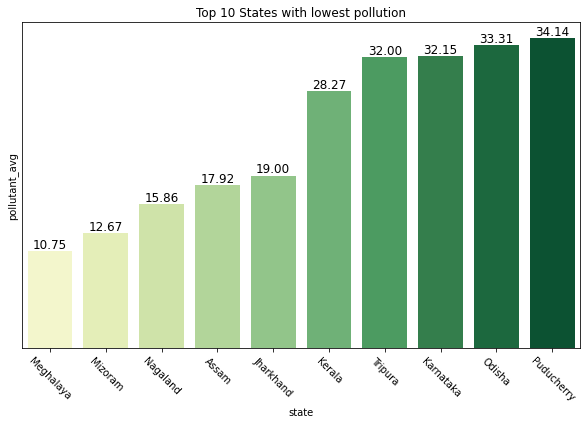

In [17]:
plt.figure(figsize=(10, 6))

lowest_states=df.groupby(['state'])['pollutant_avg'].mean().nsmallest(10).reset_index()
ax=sns.barplot(data=lowest_states,x='state',y='pollutant_avg',palette='YlGn')
for p in ax.patches:
    ax.annotate(format((p.get_height()), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='top',
                   size=12,
                   xytext=(0, 13),
                   textcoords='offset points')
plt.tick_params(left = False,labelleft = False)
plt.xticks(rotation=315)
plt.title('Top 10 States with lowest pollution')
plt.show()

###  Perform k means clustering to find which of States have high amount of pollution and classify them.

In [43]:
df1=df.copy()

In [94]:
df1

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.000000,109.000000,86.00000
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.000000,138.000000,105.00000
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.000000,42.000000,19.00000
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.000000,5.000000,4.00000
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.000000,42.000000,27.00000
5,6,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",CO,21-10-2021 01:00:00,15.000000,45.000000,32.00000
6,7,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",OZONE,21-10-2021 01:00:00,4.000000,82.000000,42.00000
7,8,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",PM2.5,21-10-2021 01:00:00,47.000000,111.000000,71.00000
8,9,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",PM10,21-10-2021 01:00:00,49.000000,120.000000,86.00000
9,10,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",NO2,21-10-2021 01:00:00,11.000000,44.000000,23.00000


In [95]:
df1.drop(['id','country','last_update','city','pollutant_id','station','state'],axis = 1,inplace = True)


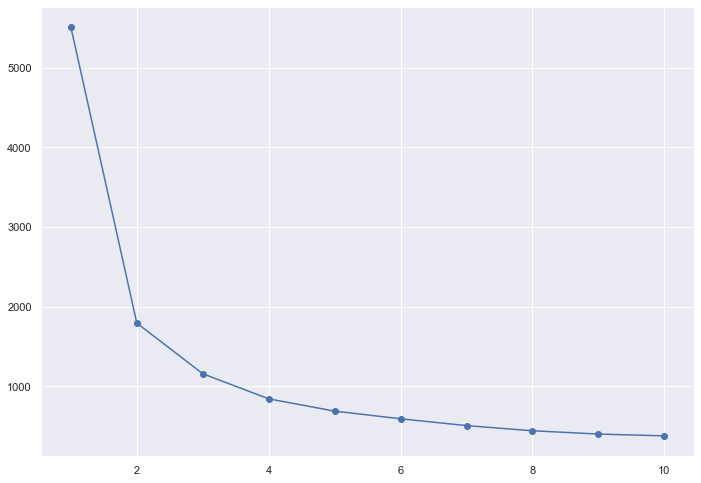

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df1)
from sklearn.cluster import KMeans
wss = []
for i in range(1,11):
    cluster = KMeans(n_clusters=i,init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
    cluster.fit(X)
    wss.append(cluster.inertia_)
    
plt.plot(range(1,11),wss,marker ='o')

In [148]:
cluster_final = KMeans(n_clusters=2)
pred = cluster_final.fit_predict(X)
df['predict'] = pred

In [193]:
df[df["predict"]==1]['state'].unique()

array(['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Delhi',
       'Gujarat', 'Haryana', 'Jammu_&_Kashmir', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Punjab', 'Rajasthan',
       'TamilNadu', 'Telangana', 'Uttar_Pradesh', 'West_Bengal'],
      dtype=object)

In [194]:
df[df["predict"]==0]['state'].unique()

array(['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Delhi', 'Gujarat', 'Haryana', 'Jammu_&_Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'TamilNadu', 'Telangana', 'Tripura',
       'Uttar_Pradesh', 'West_Bengal'], dtype=object)

In [149]:
df

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg,predict
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0,0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0,1
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0,0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0,0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0,0
5,6,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",CO,21-10-2021 01:00:00,15.0,45.0,32.0,0
6,7,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",OZONE,21-10-2021 01:00:00,4.0,82.0,42.0,0
7,8,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",PM2.5,21-10-2021 01:00:00,47.0,111.0,71.0,0
8,9,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",PM10,21-10-2021 01:00:00,49.0,120.0,86.0,0
9,10,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",NO2,21-10-2021 01:00:00,11.0,44.0,23.0,0


In [190]:
df5=df.groupby('state')['predict'].mean().sort_values().reset_index()
df5

,state,predict
0,Tripura,0.000000
1,Chhattisgarh,0.000000
2,Puducherry,0.000000
3,Odisha,0.000000
4,Nagaland,0.000000
5,Jharkhand,0.000000
6,Mizoram,0.000000
7,Meghalaya,0.000000
8,Kerala,0.018519
9,Karnataka,0.032258


In [191]:
df5["status"]=df5["predict"].apply(lambda x: "Polluted" if x>0.1 else "Non polluted")

In [192]:
df5

,state,predict,status
0,Tripura,0.000000,Non polluted
1,Chhattisgarh,0.000000,Non polluted
2,Puducherry,0.000000,Non polluted
3,Odisha,0.000000,Non polluted
4,Nagaland,0.000000,Non polluted
5,Jharkhand,0.000000,Non polluted
6,Mizoram,0.000000,Non polluted
7,Meghalaya,0.000000,Non polluted
8,Kerala,0.018519,Non polluted
9,Karnataka,0.032258,Non polluted
